Amac hata kareler toplaminin minimize eden katsayilari bir ceza uygulayarak bulmak

Ridge regresyonunun tum degiskenleri modelde birakma dezavantajini gidermek icin onerilir

Lasso da katsayilari sifira yaklastirir

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [9]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"] #bagimli degiskenimiz

X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train , y_test = train_test_split(X,
                                                     y,
                                                     test_size =0.25,
                                                     random_state = 42)

In [11]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [13]:
df.shape

(263, 20)

In [15]:
lasso_model = Lasso().fit(X_train,y_train)

/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [17]:
lasso_model

Lasso()

In [21]:
lasso_model.intercept_

-5.587450677335937

In [23]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [25]:
#farkli lambda degerlerine karsilik katsayilar

In [31]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,1000,10)

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.477e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.531e+04, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


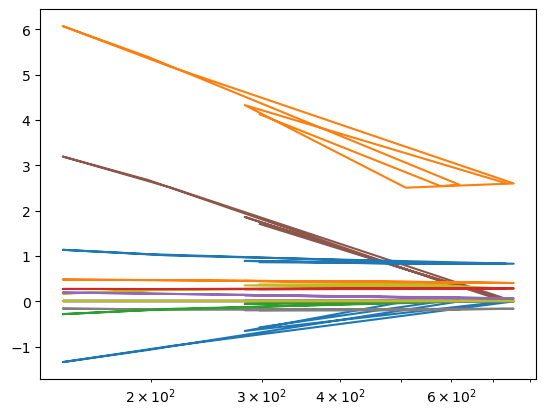

In [33]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

### Tahmin

In [36]:
lasso_model

Lasso()

In [40]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [42]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [44]:
y_pred = lasso_model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.09758845540335

In [48]:
r2_score(y_test,y_pred) #bagimsiz degiskenlerce bagimsiz degiskende olan aciklanma suresi

0.41422798132366156

### Model Tuning

In [51]:
lasso_cv_model = LassoCV(cv=10,max_iter = 100000).fit(X_train,y_train)

In [53]:
lasso_cv_model.alpha_

563.4670501833853

In [55]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

In [59]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

In [61]:
y_pred = lasso_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))